In [20]:
# Identificar columnas numéricas
columnas_numericas = df_combinado.select_dtypes(include=['float64', 'int64']).columns

# Rellenar valores faltantes solo en las columnas numéricas con la media
df_combinado[columnas_numericas] = df_combinado[columnas_numericas].fillna(df_combinado[columnas_numericas].mean())

# Asegurarse de que los valores faltantes se han tratado
print(df_combinado.isnull().sum())


Car_Name              14527
Year                      0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Fuel_Type             14527
Seller_Type           14527
Transmission          12468
Owner                 12468
name                   2360
year                      0
selling_price             0
km_driven                 0
fuel                   2360
seller_type            2360
transmission           2360
owner                  2360
mileage                6921
engine                 6921
max_power              6915
torque                 6922
seats                     0
Make                  12769
Model                 12769
Price                     0
Kilometer                 0
Fuel Type             12769
Location              12769
Color                 12769
Seller Type           12769
Engine                12849
Max Power             12849
Max Torque            12849
Drivetrain            12905
Length                    0
Width               

In [22]:
# Aplicar One Hot Encoding a las columnas categóricas
df_combinado = pd.get_dummies(df_combinado, drop_first=True)


In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

# Aquí 'Price' es el nombre de la columna objetivo que deseas predecir
target_column = 'Price'  # Cambia esto por el nombre correcto

# Dividir en características (X) y etiquetas (y)
X = df_combinado.drop(target_column, axis=1)
y = df_combinado[target_column]

# Seleccionar las mejores características usando ANOVA F-Test
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Mostrar las características seleccionadas
print(X_new)


C:\Users\KEVIN VIVER\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[[2.01400000e+03 3.35000000e+00 5.59000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.01300000e+03 4.75000000e+00 9.54000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.01700000e+03 7.25000000e+00 9.85000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.01300000e+03 4.66129568e+00 7.62847176e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.01800000e+03 4.66129568e+00 7.62847176e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.01700000e+03 4.66129568e+00 7.62847176e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [26]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento (train) y prueba (test)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (11862, 5832)
Tamaño del conjunto de prueba: (2966, 5832)


In [28]:
from sklearn.linear_model import LinearRegression

# Entrenar un modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test)


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el error cuadrático medio (MSE) y R cuadrado (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² (Coeficiente de determinación):", r2)


Mean Squared Error (MSE): 1442796951038.2607
R² (Coeficiente de determinación): -0.6913418761967374


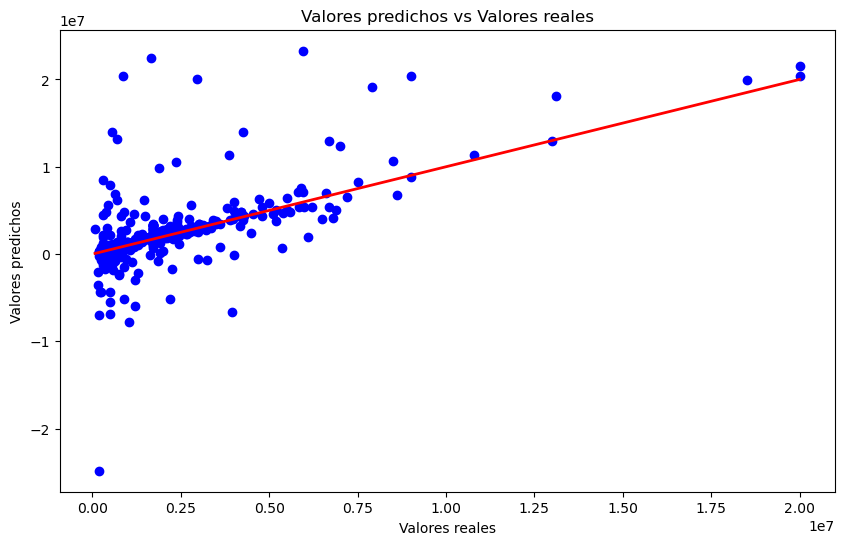

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Valores predichos vs Valores reales')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()


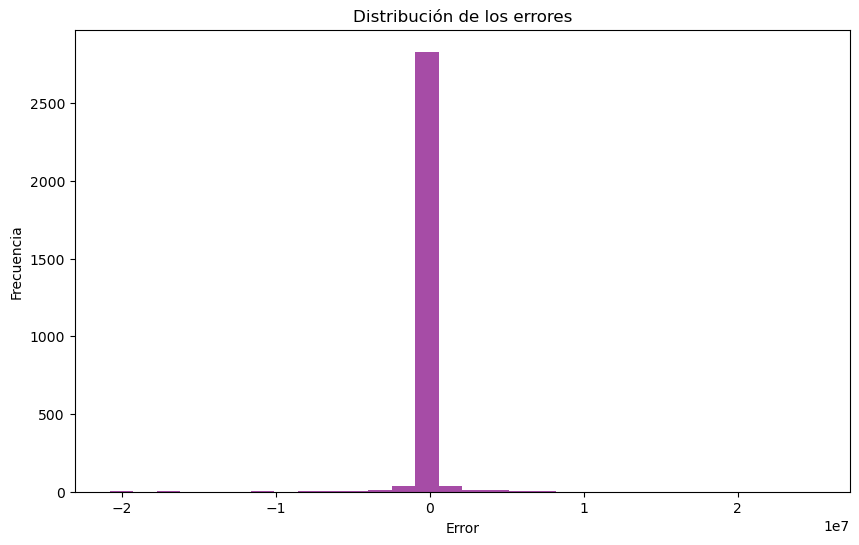

In [39]:
import matplotlib.pyplot as plt

# Supón que tienes los errores calculados
errores = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(errores, bins=30, color='purple', alpha=0.7)  # Ajusta el número de bins
plt.title('Distribución de los errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()